In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Expanded_data_with_more_features.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Dropping unnamed column

In [8]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


Gender distribution

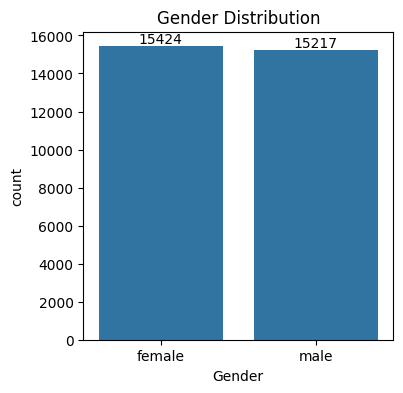

In [29]:
plt.figure(figsize=(4,4))
val= sns.countplot(data= df, x="Gender")
val.bar_label(val.containers[0])
plt.title("Gender Distribution")
plt.show()

In [19]:
grpby = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(grpby)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


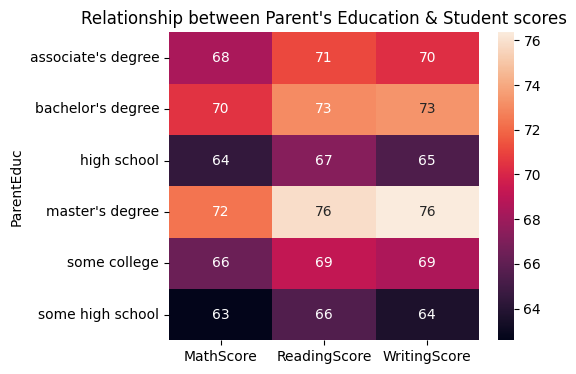

In [30]:
plt.figure(figsize=(5,4))
sns.heatmap(grpby,annot=True)
plt.title("Relationship between Parent's Education & Student scores")
plt.show()

from the above heatmap, we have observed that student's scores are dependent on parent's education!

In [26]:
grpby1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(grpby1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


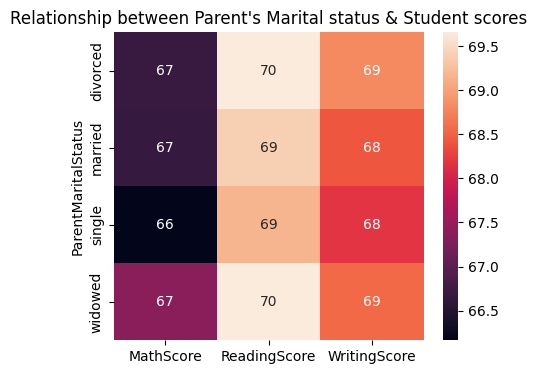

In [31]:
plt.figure(figsize=(5,4))
sns.heatmap(grpby1,annot=True)
plt.title("Relationship between Parent's Marital status & Student scores")
plt.show()

Parent's Marital Status does not effect the student's scores or it is negligible.

In [32]:
grpby2 = df.groupby("PracticeSport").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(grpby2)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


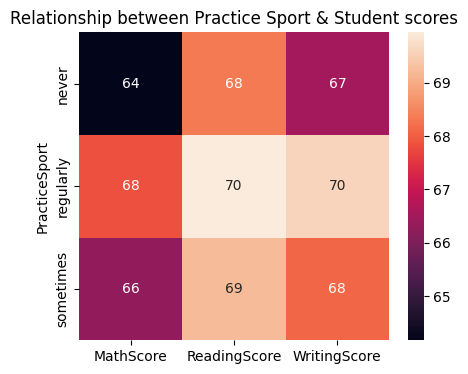

In [33]:
plt.figure(figsize=(5,4))
sns.heatmap(grpby2,annot=True)
plt.title("Relationship between Practice Sport & Student scores")
plt.show()

#boxplot= to check outliers,the range

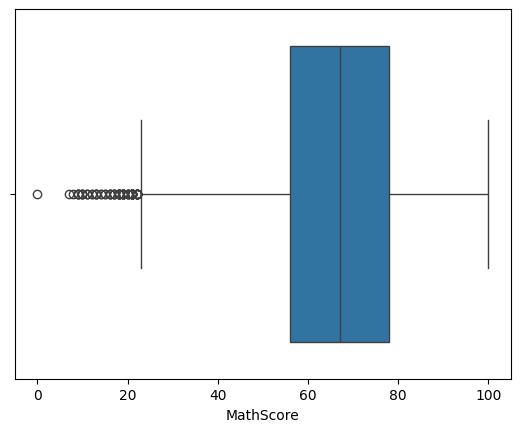

In [37]:
sns.boxplot(data=df,x="MathScore")
plt.show()

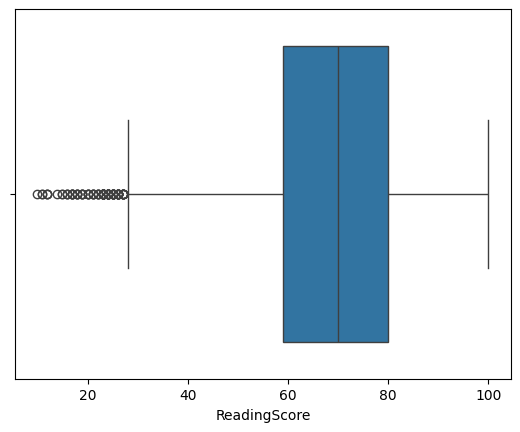

In [38]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

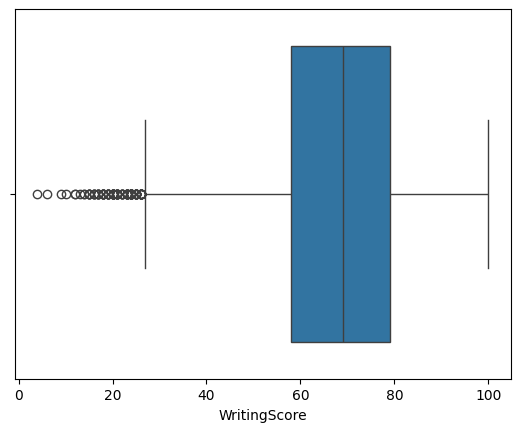

In [39]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [40]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [41]:
#Distribution of Ethnic Groups,needs count
#percentage distribution=pie chart

In [44]:
groupA= df.loc[(df['EthnicGroup']=="group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [45]:
groupB= df.loc[(df['EthnicGroup']=="group B")].count()
print(groupB)

Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64


In [46]:
groupC= df.loc[(df['EthnicGroup']=="group C")].count()
print(groupC)

Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport          9050
IsFirstChild           8929
NrSiblings             8763
TransportMeans         8280
WklyStudyHours         8933
MathScore              9212
ReadingScore           9212
WritingScore           9212
dtype: int64


In [47]:
groupD= df.loc[(df['EthnicGroup']=="group D")].count()
print(groupD)

Gender                 7503
EthnicGroup            7503
ParentEduc             7056
LunchType              7503
TestPrep               7070
ParentMaritalStatus    7218
PracticeSport          7343
IsFirstChild           7285
NrSiblings             7106
TransportMeans         6713
WklyStudyHours         7270
MathScore              7503
ReadingScore           7503
WritingScore           7503
dtype: int64


In [48]:
groupE= df.loc[(df['EthnicGroup']=="group E")].count()
print(groupE)

Gender                 4041
EthnicGroup            4041
ParentEduc             3814
LunchType              4041
TestPrep               3804
ParentMaritalStatus    3892
PracticeSport          3954
IsFirstChild           3918
NrSiblings             3820
TransportMeans         3624
WklyStudyHours         3924
MathScore              4041
ReadingScore           4041
WritingScore           4041
dtype: int64


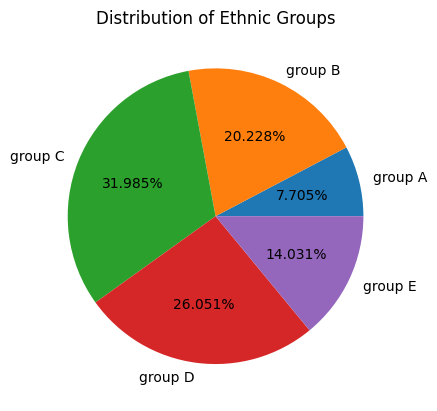

In [53]:
li=["group A","group B","group C","group D","group E"]
mylist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mylist,labels=li,autopct="%1.3f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

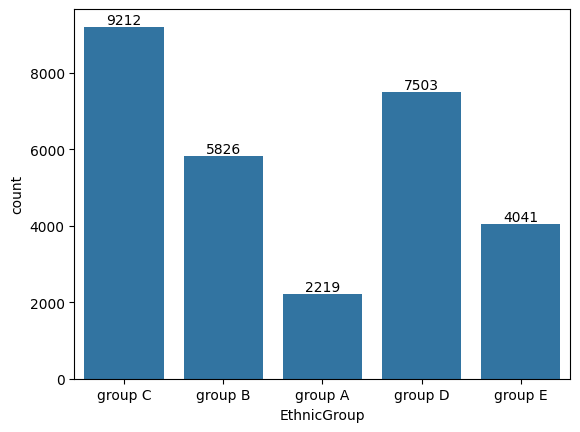

In [54]:
ax=sns.countplot(data=df,x='EthnicGroup')
ax.bar_label(ax.containers[0])

In [55]:
print(mylist)

[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]
